<a href="https://colab.research.google.com/github/fmuigai2036/Financial-Inclusion/blob/main/Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electric car usage

We have been tasked to understand electric car usag. As a Data Scientist for the Autolib electric car-sharing service company, you are to investigate a claim about the blue cars from the provided Autolib dataset.

##1.0 Define  the question
Investigate a claim about the blue cars from the autilob dataset.
1. Null hypothesis: the average number of blue cars taken is not different from that of the blue cars returned

2. Alternative hypothesis: the average number of blue cars taken is different from that of the blue cars returned(State)



##2.0 Metric of Success
It will be considered a success when we have succesfully achieved the following:

*   Investigating the state listed above and knowing whether or not the the average number of blue cars taken is different that of the blue cars returned





##Importing libraries

In [ ]:
# Let's first import our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import random
from scipy.stats import norm



###Loading our dataset

In [ ]:
# Loading the Data from the source i.e. csv
# Dataset url = https://bit.ly/DSCoreAutolibDataset
#
data = pd.read_csv('https://bit.ly/DSCoreAutolibDataset')
data

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


###Checking the data


In [ ]:
data.shape

(16085, 13)

In [ ]:
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
data.tail()

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
data.duplicated().any()

In [ ]:
data.isnull().any()

There are no missing values in our dataset.

In [ ]:
data.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
data.duplicated().sum()

There are no duplicates.

In [ ]:
# Rename columns
col_names = data.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

data.columns = col_names

In [ ]:
data.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
data.shape

(16085, 13)

In [ ]:
# We can drop off a few columns
#
data.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
data

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


In [ ]:
data.sample(5)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
12036,93400,0,weekday,106,117
14459,94230,1,weekday,43,42
10860,93200,1,weekday,57,52
11004,93230,3,weekday,21,22
396,75003,3,weekday,213,214


In [ ]:
# Extract day type data
#
data2 = data[data.day_type == 'weekday']

In [ ]:
data2.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
9978,93100,4,weekday,110,127
778,75005,0,weekday,299,284
3707,78140,4,weekday,32,33
7205,92290,4,weekday,18,17
2446,75016,4,weekday,731,734
5482,92160,4,weekday,16,15
15964,95880,0,weekday,8,11
181,75002,4,weekday,176,175
1628,75011,1,weekday,445,434
15746,95100,3,weekday,19,19


Since we are required to choose on set of data, i choose to work with weekday.

In [ ]:
data2.shape

(11544, 5)

In [ ]:
data2.nunique()

postal_code              104
dayofweek                  5
day_type                   1
bluecars_taken_sum       789
bluecars_returned_sum    781
dtype: int64

# Univariate analysis

In [ ]:
# Let us get value counts of the days of the week
#
data2['dayofweek'].value_counts(normalize=True)

0    0.205648
1    0.204695
4    0.196726
2    0.196466
3    0.196466
Name: dayofweek, dtype: float64

In [ ]:
# Describing the numerical variables
#
data2[['bluecars_taken_sum','bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,11544.000000,11544.000000
mean,116.028673,115.639380
std,169.626905,168.344751
min,0.000000,0.000000
25%,18.000000,19.000000
50%,42.000000,42.000000
75%,126.000000,126.000000
max,1093.000000,1056.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

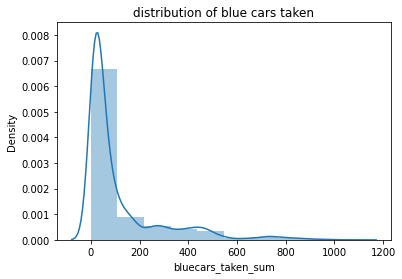

In [ ]:
# Let's plot bluecars taken
#
sns.distplot(data2['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars returned')

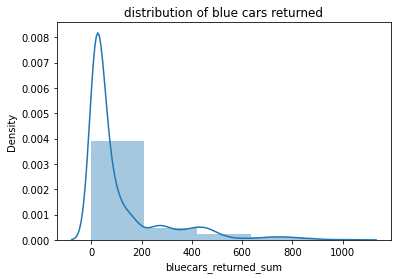

In [ ]:
# Plotting bluecars returned 
#
sns.distplot(data2['bluecars_returned_sum'], bins=5)
plt.title('distribution of blue cars returned')

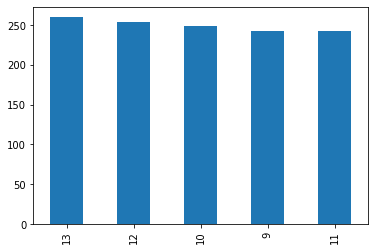

In [ ]:
# lets plot the value counts of cars returned
#
data['bluecars_returned_sum'].value_counts().head().plot.bar()

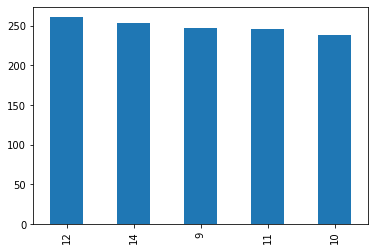

In [ ]:
# Plotting cars taken
#
data['bluecars_taken_sum'].value_counts().head().plot.bar()

# Bivariate Analysis

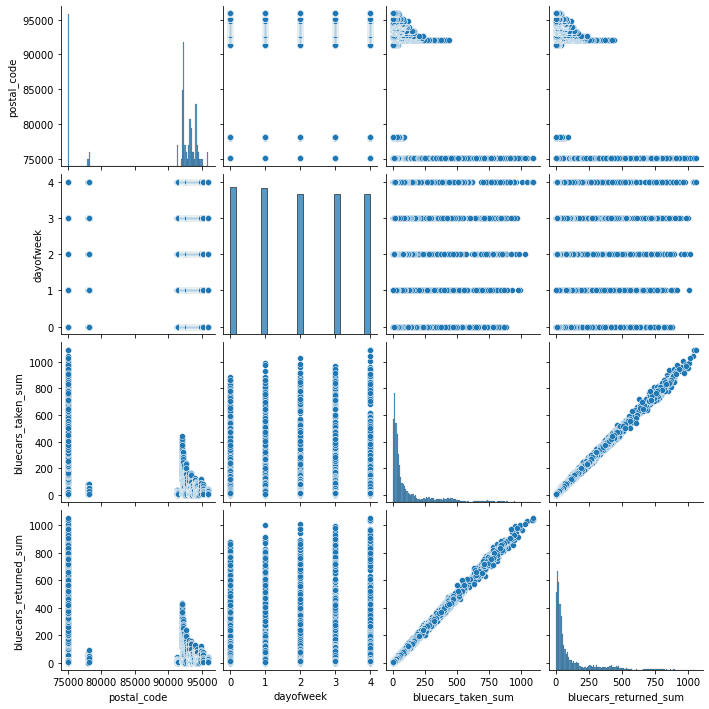

In [ ]:
# Ploting the  summaries and recording our observations
# 
sns.pairplot(data2)
plt.show()

Text(0.5, 1.0, 'bluecars_taken vs bluecars_returned_sum')

<Figure size 936x720 with 0 Axes>

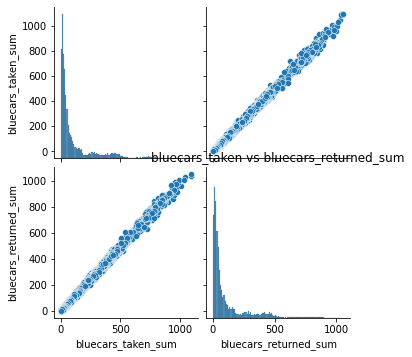

In [ ]:
# Checking correlation between our numerical variables
#
plt.figure(figsize=(13,10))
sns.pairplot(data2[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')

In [ ]:
data['bluecars_taken_sum'].corr(data2['bluecars_returned_sum'])

0.9987802776217566

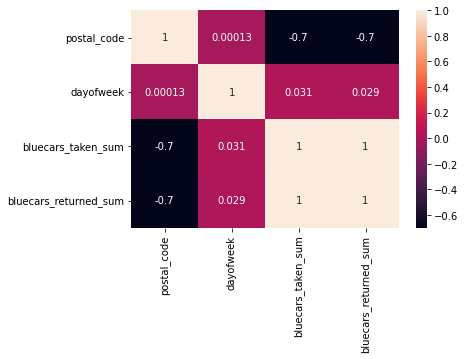

In [ ]:
# Let's plot our heatmap
#
sns.heatmap(data2.corr(),annot=True)
plt.show()

# Hypothesis Testing

In [ ]:
# Null hypothesis: the average number of blue cars taken is not different from that of the blue cars returned

# Alternative hypothesis: the average number of blue cars taken is different from that of the blue cars returned(State)

In [ ]:
# Checking content of our columns
#
data2.columns

Index(['postal_code', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum'],
      dtype='object')

In [ ]:
# We then check the datatypes
#
data2.dtypes

postal_code               int64
dayofweek                 int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object

In [ ]:
# We can also drop the day type
#
data2.drop(['day_type'], axis=1, inplace=True)
data2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,110,103
1,75001,1,98,94
2,75001,2,138,139
3,75001,3,104,104
4,75001,4,114,117
...,...,...,...,...
16078,95880,2,12,13
16079,95880,3,15,13
16080,95880,4,15,10
16083,95880,0,11,14


In [ ]:
# We use stratified sample
#
data1 = data2.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
data1

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
9892,92800,0,72,66
12878,93800,0,4,12
326,75003,0,218,220
13338,94110,0,35,38
3246,75112,0,7,7
...,...,...,...,...
1443,75010,4,303,294
9924,92800,4,98,93
8125,92350,4,28,21
3807,78150,4,36,38


In [ ]:
# we are going to pop the mean
#
x = data['bluecars_taken_sum'].mean()
x

125.92695057506994

In [ ]:
y = data['bluecars_returned_sum'].mean()
y

125.912713708424

In [ ]:
# Getting the sample mean
z = data1['bluecars_taken_sum'].mean()
z

121.60918544194108

In [ ]:
p = data1['bluecars_returned_sum'].mean()
p

120.98960138648181

In [ ]:
# sample standard deviation
n = data1['bluecars_taken_sum'].std()
n

178.71492400261744

In [ ]:
# calculating the z-score
zscore = (z-x) / n
zscore

-0.02416007033114717

In [ ]:
# calculating the p value
#from scipy.stats import norm
pro = stats.norm.cdf(zscore)
pro

0.49036246404262984

In [ ]:
# Let's now interpretate the p value
#
if pro < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [ ]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

data['bluecars_taken_sum'].mean() - data1['bluecars_taken_sum'].mean()

4.317765133128859

## In Conclusion
We fail to reject the null hypothesis because there was no enough evidence to show proof that the average means of the bluecars taken and returned are not equal.